# Machine Learning
Katie Thomas  
kdt13@pitt.edu

Now onto the fun stuff!

## Table of Contents
1. DataFrames used:
    - [All posts and responses](#Posts-and-responses-all-together,-with-known-genders): a quick summary of the file I will be using to predict gender, regardless of whether they are the poster or responder
    - [Both genders visible](#Responses-to-posts,-genders-visible): a quick summary of the file I will be using to predict both genders, given the response text only
2. [Machine Learning plan](#Solidifying-ML-plan): a discussion of my plan for the different classifiers, as well as a cleanup of the file to be used for this
3. Machine Learning:
    - [Predicting singular gender](#Predict-gender-of-poster/responder): attempting to predict the gender, regardless of whether the text was from a post or response
        - also an attempt to add more features, other than just text
    - [Predicting both genders](#Predict-both-genders): attempting to predict the gender of both the poster and responder, just give the responder's text
    - [Predicting poster's gender](#Predict-poster-gender): attempting to predict the gender of the poster, given the response text

### Setting up

In [1]:
# import things
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Posts and responses all together, with known genders
This dataframe will be used to predict gender, regardless of whether they were the poster or responder.

In [2]:
all_posts_responses = pd.read_pickle("all_posts_responses.pkl")
all_posts_responses.head()

,gender,text,text_length,avg_slen,hedges,questions,source
0,M,It's time to put Obama in the history books. W...,37,18.5,0,0,fb_congress_post
1,M,"Recently, President George H. and Barbara Bush...",28,14.0,0,0,fb_congress_post
2,M,"In Texas, we're proud to say Merry Christmas.",11,11.0,0,0,fb_congress_post
3,M,"Thanks Hollywood, but no thanks. #NeverHillary",9,4.5,0,0,fb_congress_post
4,M,"Tonight, Hillary Clinton will try to make Amer...",30,10.0,0,0,fb_congress_post


In [3]:
# gender distribution
all_posts_responses.gender.value_counts()

M    120942
W     80232
Name: gender, dtype: int64

In [4]:
# group by source and gender
all_posts_responses.groupby(['source','gender'])['text_length', 'avg_slen', 'hedges', 'questions'].mean()

text_length   avg_slen    hedges  questions
source             gender                                             
fb_congress_post   M         58.557046  18.467116  0.030175   0.000690
                   W         63.528487  19.074537  0.026096   0.000410
fb_wiki_post       M         46.945060  12.760179  0.060988   0.001848
                   W         33.766075  11.490703  0.028858   0.000306
fitocracy_post     M         17.090438   9.240126  0.033749   0.000221
                   W         18.678670   9.320622  0.036405   0.000132
fitocracy_response M         16.063640   8.071550  0.043801   0.000490
                   W         35.761518  12.396510  0.031094   0.000196
reddit_post        M         39.930960  13.481618  0.128358   0.000380
                   W         48.008666  13.771372  0.173412   0.000476
reddit_response    M         36.536314  12.686707  0.147251   0.000285
                   W         46.973231  13.401825  0.175908   0.000000

In [5]:
# group by gender
all_posts_responses.groupby('gender')['text_length', 'avg_slen', 'hedges', 'questions'].mean()

,text_length,avg_slen,hedges,questions
gender,,,,
M,33.329786,12.209336,0.070720,0.000488
W,34.864381,12.177207,0.052298,0.000249


All of these stats are very similar, regardless of gender (even the hedges, which I predicted would be more prominent in female posters). This makes me believe that simply looking at text would be our best bet here.

## Responses to posts, genders visible
This dataframe will be used to predict gender of poster and responder, based on responder's reaction.

In [6]:
gender_visible_df = pd.read_pickle("gender_visible_df.pkl")
gender_visible_df.head()

,op_id,op_gender,responder_id,responder_gender,post_text,response_text,source,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_hedges,response_hedges,post_questions,response_questions
0,102,W,1196122,M,Thanks for the follow! I followed back :) I ...,One day at a time! =],fitocracy,"[Thanks, for, the, follow, !, I, followed, bac...","[One, day, at, a, time, !, =, ]]",25,8,12.5,4.000000,0,0,0,0
1,104,W,5867,W,I've decided I have this crazy goal of running...,Crazy is synonymous with awesome in this case.,fitocracy,"[I, 've, decided, I, have, this, crazy, goal, ...","[Crazy, is, synonymous, with, awesome, in, thi...",13,9,13.0,9.000000,0,0,0,0
2,104,W,1635,M,"Umm, yeah, so those are assisted pull-ups. Bef...",You can enter assisted pullups. Select pullups...,fitocracy,"[Umm, ,, yeah, ,, so, those, are, assisted, pu...","[You, can, enter, assisted, pullups, ., Select...",19,57,9.5,11.400000,0,0,0,0
3,117,M,8520,W,dam gurl lookin mad tone in dat pp holla bb,"Mirin 3% bodyfat? Yeah, you are.",fitocracy,"[dam, gurl, lookin, mad, tone, in, dat, pp, ho...","[Mirin, 3, %, bodyfat, ?, Yeah, ,, you, are, .]",10,10,10.0,5.000000,0,0,0,0
4,117,M,29126,M,What's up there bear mode?,"Hey! I just started a new job, so things are s...",fitocracy,"[What, 's, up, there, bear, mode, ?]","[Hey, !, I, just, started, a, new, job, ,, so,...",7,26,7.0,8.666667,0,0,0,0


In [7]:
gender_visible_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396766 entries, 0 to 396765
Data columns (total 17 columns):
op_id                 396766 non-null object
op_gender             396766 non-null object
responder_id          396766 non-null object
responder_gender      396766 non-null object
post_text             396766 non-null object
response_text         396766 non-null object
source                396766 non-null object
post_tokens           396766 non-null object
response_tokens       396766 non-null object
post_length           396766 non-null int64
response_length       396766 non-null int64
post_avg_slen         396766 non-null float64
response_avg_slen     396766 non-null float64
post_hedges           396766 non-null int64
response_hedges       396766 non-null int64
post_questions        396766 non-null int64
response_questions    396766 non-null int64
dtypes: float64(2), int64(6), object(9)
memory usage: 51.5+ MB


Everything looks great! Let's recap some basic stats:

In [8]:
# poster gender distribution
gender_visible_df.op_gender.value_counts()

M    237339
W    159427
Name: op_gender, dtype: int64

In [9]:
# responder gender distribution
gender_visible_df.responder_gender.value_counts()

M    217639
W    179127
Name: responder_gender, dtype: int64

In [10]:
gender_visible_df.groupby(['source','op_gender','responder_gender'])['post_length','response_length',
                                                                     'post_avg_slen','response_avg_slen'].mean()

post_length  response_length  \
source    op_gender responder_gender                                 
fitocracy M         M                   19.023550        16.612086   
                    W                   15.503597        31.527746   
          W         M                   19.160420        15.814585   
                    W                   18.134494        40.720844   
reddit    M         M                   48.399651        38.106992   
                    W                   62.564599        48.993869   
          W         M                   55.883847        50.545774   
                    W                   58.729640        47.042140   

                                      post_avg_slen  response_avg_slen  
source    op_gender responder_gender                                    
fitocracy M         M                      9.677136           8.384321  
                    W                      8.910398          11.419609  
          W         M                      9.066472           7.888464  
                    W                      9.586728          13.561374  
reddit    M         M                     13.993324          12.982770  
                    W                     15.221700          13.782006  
          W         M                     14.828193          14.161640  
                    W                     15.947841          14.290182

So Reddit posts seem to be longer overall than posts on Fitocracy. This makes me believe that this may not be such a good statistic to use for machine learning. The more important factor may be the actual content of the text.

In [11]:
# hedges

# male posters with hedges
male_hedges_post = gender_visible_df[(gender_visible_df.op_gender == 'M') & (gender_visible_df.post_hedges != 0)]
# male responders with hedges
male_hedges_response = gender_visible_df[(gender_visible_df.responder_gender == 'M') & (gender_visible_df.response_hedges != 0)]

# female posters with hedges
female_hedges_post = gender_visible_df[(gender_visible_df.op_gender == 'W') & (gender_visible_df.post_hedges != 0)]
# female responders with hedges
female_hedges_response = gender_visible_df[(gender_visible_df.responder_gender == 'W') & (gender_visible_df.response_hedges != 0)]

print('percentage male posters with hedges:',
      len(male_hedges_post.index) / gender_visible_df.op_gender.value_counts()['M'])

print('percentage female posters with hedges:',
      len(female_hedges_post.index) / gender_visible_df.op_gender.value_counts()['W'])

print('percentage male responders with hedges:',
      len(male_hedges_response.index) / gender_visible_df.responder_gender.value_counts()['M'])

print('percentage female responders with hedges:',
      len(female_hedges_response.index) / gender_visible_df.responder_gender.value_counts()['W'])

percentage male posters with hedges: 0.0597668314099242
percentage female posters with hedges: 0.04752018165053598
percentage male responders with hedges: 0.06502051562449744
percentage female responders with hedges: 0.043739916372182865


This is actually the opposite trend that I wanted to see. It was my belief coming in that female posters/responders would use more hedges, but that is in fact not the case. But Reddit was actually skewed in the direction I wanted! What does just Reddit data look like?

In [12]:
reddit = gender_visible_df[gender_visible_df.source == 'reddit']

# male posters with hedges
male_hedges_post = reddit[(reddit.op_gender == 'M') & (reddit.post_hedges != 0)]
# male responders with hedges
male_hedges_response = reddit[(reddit.responder_gender == 'M') & (reddit.response_hedges != 0)]

# female posters with hedges
female_hedges_post = reddit[(reddit.op_gender == 'W') & (reddit.post_hedges != 0)]
# female responders with hedges
female_hedges_response = reddit[(reddit.responder_gender == 'W') & (reddit.response_hedges != 0)]

print('percentage male posters with hedges:',
      len(male_hedges_post.index) / reddit.op_gender.value_counts()['M'])

print('percentage female posters with hedges:',
      len(female_hedges_post.index) / reddit.op_gender.value_counts()['W'])

print('percentage male responders with hedges:',
      len(male_hedges_response.index) / reddit.responder_gender.value_counts()['M'])

print('percentage female responders with hedges:',
      len(female_hedges_response.index) / reddit.responder_gender.value_counts()['W'])

percentage male posters with hedges: 0.14174305435449128
percentage female posters with hedges: 0.19084073820915926
percentage male responders with hedges: 0.12842243547637738
percentage female responders with hedges: 0.1791044776119403


So this looks how I'd expect. It seems to be the Fitocracy data that is messing with my hypothesis. Thus, using the hedge data in machine learning will not work for this combined data set. Maybe we should just focus on the text.

## Solidifying ML plan

So what do I actually want to be able to predict?

1. Simply the gender of the poster/responder, based on the text alone (ignoring whether they are the poster or responder).
2. A more interesting and complicated topic would be analyzing the responder's text and predicting both their own gender and the original poster's gender. This way, we could see if different genders really do respond differently given who they are responding to. Let's make a dataframe that would fit this purpose:

In [13]:
# getting just the columns we want
responder_df = gender_visible_df[['op_gender','responder_gender','response_text',
                                  'response_tokens','response_length','response_avg_slen','source']]

responder_df.head()

,op_gender,responder_gender,response_text,response_tokens,response_length,response_avg_slen,source
0,W,M,One day at a time! =],"[One, day, at, a, time, !, =, ]]",8,4.000000,fitocracy
1,W,W,Crazy is synonymous with awesome in this case.,"[Crazy, is, synonymous, with, awesome, in, thi...",9,9.000000,fitocracy
2,W,M,You can enter assisted pullups. Select pullups...,"[You, can, enter, assisted, pullups, ., Select...",57,11.400000,fitocracy
3,M,W,"Mirin 3% bodyfat? Yeah, you are.","[Mirin, 3, %, bodyfat, ?, Yeah, ,, you, are, .]",10,5.000000,fitocracy
4,M,M,"Hey! I just started a new job, so things are s...","[Hey, !, I, just, started, a, new, job, ,, so,...",26,8.666667,fitocracy


In [14]:
# let's combine op_gender and responder_gender into one column, because this is what we want to predict
# original poster's gender is first character, responder's gender is second character
responder_df['gender_info'] = responder_df.op_gender + responder_df.responder_gender
responder_df.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,op_gender,responder_gender,response_text,response_tokens,response_length,response_avg_slen,source,gender_info
0,W,M,One day at a time! =],"[One, day, at, a, time, !, =, ]]",8,4.000000,fitocracy,WM
1,W,W,Crazy is synonymous with awesome in this case.,"[Crazy, is, synonymous, with, awesome, in, thi...",9,9.000000,fitocracy,WW
2,W,M,You can enter assisted pullups. Select pullups...,"[You, can, enter, assisted, pullups, ., Select...",57,11.400000,fitocracy,WM
3,M,W,"Mirin 3% bodyfat? Yeah, you are.","[Mirin, 3, %, bodyfat, ?, Yeah, ,, you, are, .]",10,5.000000,fitocracy,MW
4,M,M,"Hey! I just started a new job, so things are s...","[Hey, !, I, just, started, a, new, job, ,, so,...",26,8.666667,fitocracy,MM


In [15]:
# drop the columns (keep op_gender in there for later)
responder_df.drop(labels=['responder_gender'], axis=1, inplace=True)
responder_df.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,op_gender,response_text,response_tokens,response_length,response_avg_slen,source,gender_info
0,W,One day at a time! =],"[One, day, at, a, time, !, =, ]]",8,4.000000,fitocracy,WM
1,W,Crazy is synonymous with awesome in this case.,"[Crazy, is, synonymous, with, awesome, in, thi...",9,9.000000,fitocracy,WW
2,W,You can enter assisted pullups. Select pullups...,"[You, can, enter, assisted, pullups, ., Select...",57,11.400000,fitocracy,WM
3,M,"Mirin 3% bodyfat? Yeah, you are.","[Mirin, 3, %, bodyfat, ?, Yeah, ,, you, are, .]",10,5.000000,fitocracy,MW
4,M,"Hey! I just started a new job, so things are s...","[Hey, !, I, just, started, a, new, job, ,, so,...",26,8.666667,fitocracy,MM


## Predict gender of poster/responder
Let's start simple! Given our `all_posts_responses` dataframe, can we predict the gender of the poster/responder?

In [16]:
all_posts_responses.head()

,gender,text,text_length,avg_slen,hedges,questions,source
0,M,It's time to put Obama in the history books. W...,37,18.5,0,0,fb_congress_post
1,M,"Recently, President George H. and Barbara Bush...",28,14.0,0,0,fb_congress_post
2,M,"In Texas, we're proud to say Merry Christmas.",11,11.0,0,0,fb_congress_post
3,M,"Thanks Hollywood, but no thanks. #NeverHillary",9,4.5,0,0,fb_congress_post
4,M,"Tonight, Hillary Clinton will try to make Amer...",30,10.0,0,0,fb_congress_post


In [17]:
all_posts_responses.text.value_counts().head()

Welcome! Fitocracy is a great place to track your workouts and keep consistent, with a very supportive community. To help you find your way around:                Getting Started Guides:        On the web - http://bit.ly/I5PoXP        On iPhone - http://bit.ly/N2IXHE                If you need help finding an exercise name, have questions about training, etc--leave me a message on my profile or ask the Welcome to Fitocracy group:        http://ftcy.co/UpSig0        Glad to know ya ;)    4444
just joined the WTF - Welcome to Fitocracy group!                                                                                                                                                                                                                                                                                                                                                                                                                                                           3557
Hello 

Something to note... it seems like a lot of these messages are auto-generated when joining some group, or there's a lot of duplicates because it's something simple like "thanks for the follow!" Let's drop all duplicates.

In [18]:
all_posts_responses.drop_duplicates(subset='text', keep=False, inplace=True)

In [19]:
# make sure
all_posts_responses.text.value_counts().head()

Y'all close your eyes and go to sleep. God is up.. No need for you both to be awake. ;) Listen, never lose HOPE you don't know what tomorrow may bring! Keep your trust in GOD... Always!!                                1
Never going to the doctor. Yeah ok you used ducttape and superglue to put your finger tip back on, so manly. But seriously, get in the car, Im taking you to the emergency room. NOW, we arent waiting for commercial!    1
Wow that looks to be in great condition. And original wheels too!                                                                                                                                                         1
The Senate has passed the bi-partisan agreement to end the shutdown and avoid default.  We are awaiting the arrival of the bill on the House floor so that we may vote on it.                                             1
Baby I love you, but what the hell does your username mean?                                                             

Good - no more duplicates!

In [20]:
all_posts_responses.gender.value_counts(normalize=True)

M    0.633731
W    0.366269
Name: gender, dtype: float64

So our baseline is 63% here.

### Using Naive-Bayes

In [21]:
X = list(all_posts_responses.text)
y = list(all_posts_responses.gender)

# create train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(len(y_train))
print(len(y_test))

137951
34488


In [22]:
# fit to model
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

# this takes way too long - maybe try CRC
#model = make_pipeline(TfidfVectorizer(ngram_range=(1,2), stop_words='english'), SVC(kernel='linear', C=1E3, random_state=0))

# choose own parameters
#model = make_pipeline(TfidfVectorizer(max_df=0.5, min_df=5, ngram_range=(1,2)),
                      #MultinomialNB())

# what if we want punctuation? takes longer to use nltk word tokenizer though. is it worth it?
import nltk
model = make_pipeline(TfidfVectorizer(max_df=0.5, min_df=5, ngram_range=(1,2), tokenizer=nltk.word_tokenize),
                      MultinomialNB())

In [23]:
# fit and predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

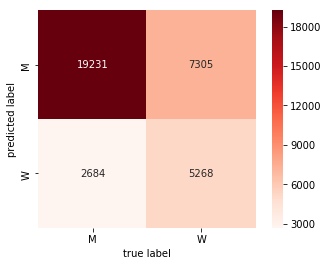

accuracy: 0.7103630248202273


In [24]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score

mat = confusion_matrix(y_test, y_pred)

labels = sorted(set(y_test))

# plot it
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap="Reds", xticklabels=labels, yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label')

# save
plt.savefig('images/predict_1gender_cm.png')

# show
plt.show()

print('accuracy:', accuracy_score(y_test, y_pred))

Note: Including nltk's tokenizer actually helps!

Note 2: before dropping duplicates, my accuracy was 70%. Dropping them actually helped a little, which is good!

So we get an accuracy of 71%! And I'm okay (ish) with a 71% accuracy when baseline was 63% - we are at least 8% better than guessing, and this is with the simplest algorithm! So what is going on with punctuation? Does one gender use more than the other? Do they use it differently?

In [25]:
# examine punctuation
print("'!' classified as", model.predict(['!'])[0], 'with probabilities:', model.predict_proba(['!']))
print("'!!' classified as", model.predict(['!!'])[0], 'with probabilities:', model.predict_proba(['!!']))
print("'?' classified as", model.predict(['?'])[0], 'with probabilities:', model.predict_proba(['?']))
print("'??' classified as", model.predict(['??'])[0], 'with probabilities:', model.predict_proba(['??']))
print("'...' classified as", model.predict(['...'])[0], 'with probabilities:', model.predict_proba(['...']))

'!' classified as W with probabilities: [[0.49130376 0.50869624]]
'!!' classified as W with probabilities: [[0.37152528 0.62847472]]
'?' classified as M with probabilities: [[0.68111603 0.31888397]]
'??' classified as M with probabilities: [[0.58720692 0.41279308]]
'...' classified as M with probabilities: [[0.61011131 0.38988869]]


In [26]:
print("'hi' classified as", model.predict(['hi'])[0], 'with probabilities:', model.predict_proba(['hi']))
print("'hi.' classified as", model.predict(['hi.'])[0], 'with probabilities:', model.predict_proba(['hi.']))
print("'hi!' classified as", model.predict(['hi!'])[0], 'with probabilities:', model.predict_proba(['hi!']))
print('--------')
print("'hello' classified as", model.predict(['hello'])[0], 'with probabilities:', model.predict_proba(['hello']))
print("'hello.' classified as", model.predict(['hello.'])[0], 'with probabilities:', model.predict_proba(['hello.']))
print("'hello!' classified as", model.predict(['hello!'])[0], 'with probabilities:', model.predict_proba(['hello!']))

'hi' classified as W with probabilities: [[0.45021854 0.54978146]]
'hi.' classified as W with probabilities: [[0.42976482 0.57023518]]
'hi!' classified as W with probabilities: [[0.26831703 0.73168297]]
--------
'hello' classified as W with probabilities: [[0.43520462 0.56479538]]
'hello.' classified as W with probabilities: [[0.44764935 0.55235065]]
'hello!' classified as W with probabilities: [[0.22856083 0.77143917]]


It seems like female posters/responders may like exclamation points more (especially prominent in saying "hello!").

### Try adding other features

I'm going to try adding text length and sentence length (and maybe hedges).

What I've tried:
1. First, I tried to do this with the whole `all_posts_responses` dataframe. But I then realized that adding these features didn't mean much since there was so much discrepency between Fitocracy and Reddit data.
2. I then tried to narrow it down to only Reddit data. However, I was still getting a ML accuracy that was lower than my baseline.
3. Finally, I tried with just Reddit posts, to try to narrow down discrepencies even more.

Unfortunately, the results were still lower than the baseline. I'm going to keep the code in here anyways, so that the reader can understand my thought process.

In [27]:
# just reddit posts
reddit = all_posts_responses[all_posts_responses.source == 'reddit_post']
reddit.head()

,gender,text,text_length,avg_slen,hedges,questions,source
146617,M,How do you afford so many prayer potions? Edi...,38,12.666667,0,0,reddit_post
146618,M,Just pm me your username and password and Ill ...,16,16.000000,0,0,reddit_post
146619,M,Its not the best xp in the game by a long shot.,13,13.000000,0,0,reddit_post
146620,M,Why are people surprised that they wont post i...,21,21.000000,0,0,reddit_post
146621,M,Wow so it would only be like 300 hours for 99,11,11.000000,0,0,reddit_post


In [28]:
reddit.gender.value_counts(normalize=True)

M    0.790324
W    0.209676
Name: gender, dtype: float64

Baseline is 79% here.

In [29]:
# train test split

X = list(reddit.text)
y = list(reddit.gender)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(len(y_train))
print(len(y_test))

39684
9921


In [30]:
# first vectorize text
text_vec = TfidfVectorizer(max_df=0.5, min_df=5, ngram_range=(1,2), tokenizer=nltk.word_tokenize)

Xtrain_fit_transf = text_vec.fit_transform(X_train)
Xtest_fit_transf = text_vec.transform(X_test)

In [31]:
print(Xtrain_fit_transf.shape)
print(Xtest_fit_transf.shape)

(39684, 51106)
(9921, 51106)


Now make into sparse matrix and combine features:

In [32]:
from scipy.sparse import coo_matrix, hstack

In [33]:
# need to find the text length and sentence length that correspond to our train test split

# training chunk of df
train_chunk = reddit.isin(X_train)
# getting this chunk from original
train_chunk = reddit[train_chunk.text]
# print to make sure same size
print(train_chunk.shape)

# testing chunk of df
test_chunk = reddit.isin(X_test)
# getting this chunk from original
test_chunk = reddit[test_chunk.text]
# print to make sure same size
print(test_chunk.shape)

(39684, 7)
(9921, 7)


In [34]:
# new features
sparse_stats_train = coo_matrix(train_chunk[['text_length']], dtype='float64')
sparse_stats_test = coo_matrix(test_chunk[['text_length']], dtype='float64')

# making sure we're keeping same sizes
print(sparse_stats_train.shape)
print(sparse_stats_test.shape)

(39684, 1)
(9921, 1)


In [35]:
# combine features
X_train = hstack([Xtrain_fit_transf, sparse_stats_train])
X_test = hstack([Xtest_fit_transf, sparse_stats_test])

# making sure we're keeping same sizes
print(X_train.shape)
print(X_test.shape)

(39684, 51107)
(9921, 51107)


In [36]:
model = MultinomialNB()

model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [37]:
y_pred = model.predict(X_test)

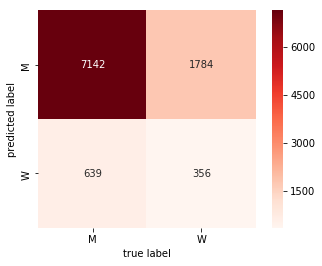

accuracy: 0.7557705876423748


In [38]:
# confusion matrix
mat = confusion_matrix(y_test, y_pred)

labels = sorted(set(y_test))

# plot it
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap="Reds", xticklabels=labels, yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label')

# save
#plt.savefig('images/')

# show
plt.show()

print('accuracy:', accuracy_score(y_test, y_pred))

This is lower than our baseline. It seems adding these features is just confusing the classifier instead of helping.

## Predict both genders
Now I think this task may be very hard, but I'm going to try it anyways. Given the text of the responder, can we predict both their own gender and the gender they are responding to? Let's get a refresher of what our dataframe looks like in this case:

In [39]:
responder_df.head()

,op_gender,response_text,response_tokens,response_length,response_avg_slen,source,gender_info
0,W,One day at a time! =],"[One, day, at, a, time, !, =, ]]",8,4.000000,fitocracy,WM
1,W,Crazy is synonymous with awesome in this case.,"[Crazy, is, synonymous, with, awesome, in, thi...",9,9.000000,fitocracy,WW
2,W,You can enter assisted pullups. Select pullups...,"[You, can, enter, assisted, pullups, ., Select...",57,11.400000,fitocracy,WM
3,M,"Mirin 3% bodyfat? Yeah, you are.","[Mirin, 3, %, bodyfat, ?, Yeah, ,, you, are, .]",10,5.000000,fitocracy,MW
4,M,"Hey! I just started a new job, so things are s...","[Hey, !, I, just, started, a, new, job, ,, so,...",26,8.666667,fitocracy,MM


In [40]:
# check for duplicates again
responder_df.response_text.value_counts().head()

Welcome! Fitocracy is a great place to track your workouts and keep consistent, with a very supportive community. To help you find your way around:                Getting Started Guides:        On the web - http://bit.ly/I5PoXP        On iPhone - http://bit.ly/N2IXHE                If you need help finding an exercise name, have questions about training, etc--leave me a message on my profile or ask the Welcome to Fitocracy group:        http://ftcy.co/UpSig0        Glad to know ya ;)                            28131
Hello and welcome! Fitocracy is a great place to track your workouts and keep consistent, with a very supportive community.        Start by earning points for any exercise...even walking up the stairs. To start:                1. Tap on the "track" icon on the bottom center of your screen.        2. Tap on "start a workout"        3. Tap on "Add an exercise"        If you need help finding an exercise, have questions about training, etc--drop me a line ;)                   

Again, some more seemingly automated messages or things that are too simple, like "thanks!". Let's drop duplicates again.

In [41]:
responder_df.drop_duplicates(subset='response_text', keep=False, inplace=True)
responder_df.response_text.value_counts().head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


comment test1                                                                                      1
:D anytime!  Keep doing awesome stuff!                                                             1
I just added it today, I'll keep tabs on you and make sure you aren't forgetting to work out!!!    1
LOL!  I have forearms like Popeye from all of the clicking.  ;)                                    1
Is god like a level.... Lets find out shall we.                                                    1
Name: response_text, dtype: int64

Looks good!

Recall: the gender_info column first lists the original poster's gender, and then the responder's gender. This is the column we want to predict.

What is our baseline here?

In [42]:
responder_df.gender_info.value_counts(normalize=True)

MM    0.383260
WM    0.240424
MW    0.240041
WW    0.136274
Name: gender_info, dtype: float64

Our highest percentage is male poster/male responder, at 38.3%.

### Using Naive Bayes
Can we simply use Naive Bayes? Or is this too complicated of a task? Let's see:

In [43]:
X = list(responder_df.response_text)
y = list(responder_df.gender_info)

# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(len(y_train))
print(len(y_test))

233616
58405


In [44]:
# use same parameters
model = make_pipeline(TfidfVectorizer(max_df=0.5, min_df=5, ngram_range=(1,2), tokenizer=nltk.word_tokenize),
                      MultinomialNB())

In [45]:
# fit and predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

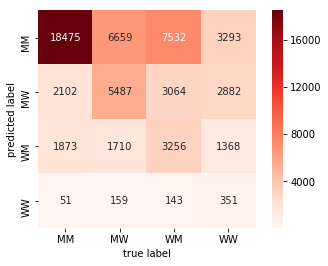

accuracy: 0.47203150415204176


In [46]:
# confusion matrix
mat = confusion_matrix(y_test, y_pred)

labels = sorted(set(y_test))

# plot it
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap="Reds", xticklabels=labels, yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label')

# save
plt.savefig('images/predict_2genders_cm.png')

# show
plt.show()

print('accuracy:', accuracy_score(y_test, y_pred))

47.2% - which doesn't sound good, but is an okay improvement from our baseline (about 9 points higher). And actually, before dropping duplicates, accuracy was only 44.8%. It looks like the easiest to identify is male poster/male responder.

## Predict poster gender

What if we just predict the gender they're responding to, and NOT try to also predict their own gender? Let's try to just predict the op_gender column.

In [47]:
# what is our baseline?
responder_df.op_gender.value_counts(normalize=True)

M    0.623301
W    0.376699
Name: op_gender, dtype: float64

So our baseline is around 62.3% here.

In [48]:
X = list(responder_df.response_text)
y = list(responder_df.op_gender)

# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(len(y_train))
print(len(y_test))

233616
58405


In [49]:
# use same parameters
model = make_pipeline(TfidfVectorizer(max_df=0.5, min_df=5, ngram_range=(1,2), tokenizer=nltk.word_tokenize),
                      MultinomialNB())

In [50]:
# fit and predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

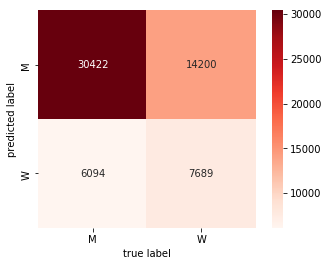

accuracy: 0.6525297491653111


In [51]:
# confusion matrix
mat = confusion_matrix(y_test, y_pred)

labels = sorted(set(y_test))

# plot it
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap="Reds", xticklabels=labels, yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label')

# save
plt.savefig('images/predict_poster_cm.png')

# show
plt.show()

print('accuracy:', accuracy_score(y_test, y_pred))

65.3%... only a couple points higher than the baseline. This seems like a difficult task.